In [1]:
from online_experts import *

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
actual_values = np.random.randint(0,10,size=[40])
def create_expert(std,actual_values):
    return actual_values+np.random.randn(actual_values.size)*std
# Fixed Standard Deviations for each expert
stds = [1,0.1,0.03,0.5,1.3,2,5,1,2,5]
expert_predictions = np.array([create_expert(std,actual_values) for std in stds])

# Averaging Predictor

In [4]:
test4 = AverageHedge()

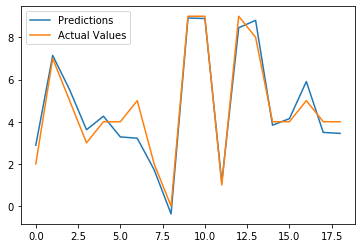

In [5]:
predictions = []
for i in range(21,40):
    predictions.append(test4._predict(expert_predictions[:,i]))
    test4._update(expert_predictions[:,i][:,np.newaxis],actual_values[i,np.newaxis])
plt.plot(predictions,label="Predictions")
plt.plot(actual_values[21:40],label="Actual Values")
plt.legend()

# Follow the Leader

http://pages.cs.wisc.edu/~shuchi/courses/787-F09/scribe-notes/projects/project-notes-3.pdf

http://proceedings.mlr.press/v35/vanerven14.pdf

In [6]:
test5 = FollowTheLeader(loss_func = se)

In [7]:
test5._update(expert_predictions[:,:20],actual_values[:20])

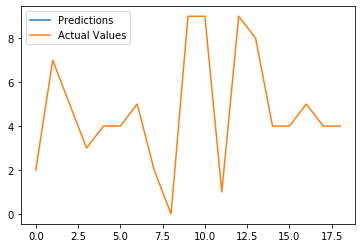

In [9]:
predictions = []
for i in range(21,40):
    predictions.append(test5._predict(expert_predictions[:,i]))
    test5._update(expert_predictions[:,i][:,np.newaxis],actual_values[i,np.newaxis])
plt.plot(predictions,label="Predictions")
plt.plot(actual_values[21:40],label="Actual Values")
plt.legend()